In [1]:
import pandas as pd

from taxumap.taxumap_base import Taxumap

# Outline

This notebook demonstrates how to 1) load your data into TaxUMAP, 2) run the TaxUMAP, and 3) save your TaxUMAP embedding and a quick scatterplot.

## 1. Load data into TaxUMAP

Your TaxUMAP, here a variable called `tu`, can be created from data saved to your hard drive, or from a Pandas DataFrame read into this Jupyter notebook.

### From file

* Make sure to follow data formatting practices detailed in the **readme** file.

In [2]:
tu = Taxumap(taxonomy='example_data/taxonomy.csv', microbiota_data='example_data/microbiota_table.csv')
tu

/Users/granthussey/github/clean-taxumap/taxumap/dataloading.py:95: UserWarning: Reading taxonomy table. Assuming columns are ordered by phylogeny with in descending order of hierarchy:
                 e.g. Kingdom, Phylum, ... , Genus, Species, etc.
                 Additionally, the OTU or ASV column must be labeled as 'OTU' or 'ASV' unless otherwise specified
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/input_validation.py:209: UserWarning: ensure_monophyletic_for_hct_dataset failed. likely not hct data set.
  warnings.warn("ensure_monophyletic_for_hct_dataset failed. likely not hct data set.")


Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])

### From local scope

* Your microbiome (`rel_abundances`) and taxonomy (`taxonomy`) DataFrames must be formatted as described below.

In [3]:
# Load your microbiome dataframe from file
rel_abundances = pd.read_csv('example_data/microbiota_table.csv')

# Make sure you properly format your index
rel_abundances['index_column'] = rel_abundances['index_column'].astype(int)

# Set your dataframe's index
rel_abundances = rel_abundances.set_index('index_column')


rel_abundances

,Uniq1,Uniq10,Uniq100,Uniq10005,Uniq100070,Uniq100161,Uniq1003,Uniq100332,Uniq100353,Uniq100360,...,Uniq99523,Uniq99645,Uniq99650,Uniq99669,Uniq99681,Uniq99709,Uniq99780,Uniq99833,Uniq99884,Uniq99979
index_column,,,,,,,,,,,,,,,,,,,,,
66600164,0.670946,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600169,0.612890,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600209,0.001633,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600224,0.006367,0.000000,0.000462,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000024
66600226,0.917854,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66704977,0.000000,0.809957,0.000027,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704978,0.000000,0.929111,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704990,0.000000,0.000000,0.000094,0.000000,0.0,0.0,0.003682,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000157


In [4]:
# Load your taxonomy dataframe from file, and set the index to ASV/OTU (in this case, OTU)
tax = pd.read_csv('example_data/taxonomy.csv').set_index('OTU')

tax

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU,,,,,,,
Uniq114339,Bacteria,Firmicutes,unk_Class_of_Phylum_Firmicutes__Uniq114339,unk_Order_of_Phylum_Firmicutes__Uniq114339,unk_Family_of_Phylum_Firmicutes__Uniq114339,unk_Genus_of_Phylum_Firmicutes__Uniq114339,unk_Species_of_Phylum_Firmicutes__Uniq114339
Uniq53046,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Veillonella,Veillonella_atypica
Uniq5707,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnospiraceae_FCS020_group,unk_Species_of_Genus_Lachnospiraceae_FCS020_gr...
Uniq45364,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella,Enterobacter
Uniq80019,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella,Escherichia_coli
...,...,...,...,...,...,...,...
Uniq103183,Bacteria,Firmicutes,Bacilli,unk_Order_of_Class_Bacilli__Uniq103183,unk_Family_of_Class_Bacilli__Uniq103183,unk_Genus_of_Class_Bacilli__Uniq103183,unk_Species_of_Class_Bacilli__Uniq103183
Uniq371,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides,Parabacteroides_distasonis
Uniq75647,Bacteria,Proteobacteria,unk_Class_of_Phylum_Proteobacteria__Uniq75647,unk_Order_of_Phylum_Proteobacteria__Uniq75647,unk_Family_of_Phylum_Proteobacteria__Uniq75647,unk_Genus_of_Phylum_Proteobacteria__Uniq75647,unk_Species_of_Phylum_Proteobacteria__Uniq75647


In [5]:
# Create TaxUMAP instance
tu = Taxumap(taxonomy=tax, microbiota_data=rel_abundances)
tu

/Users/granthussey/github/clean-taxumap/taxumap/input_validation.py:42: UserWarning: Recognized `rel_abundances` parameter as Pandas DataFrame
  warnings.warn("Recognized `rel_abundances` parameter as Pandas DataFrame")
/Users/granthussey/github/clean-taxumap/taxumap/input_validation.py:209: UserWarning: ensure_monophyletic_for_hct_dataset failed. likely not hct data set.
  warnings.warn("ensure_monophyletic_for_hct_dataset failed. likely not hct data set.")


Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])

## 2. Run TaxUMAP

In [6]:
# Run the TaxUMAP with default parameters
tu.transform_self()

/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:86: UserWarning: Please set neigh parameter to approx. the size of individals in the dataset. See documentation.
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:94: UserWarning: Setting min_dist to 0.05/sum(weights)
  warnings.warn("Setting min_dist to 0.05/sum(weights)")
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:101: UserWarning: Setting epochs to 5000
  warnings.warn("Setting epochs to %d" % epochs)
/Users/granthussey/github/clean-taxumap/taxumap/tools.py:41: UserWarning: aggregating on Phylum
  warnings.warn("aggregating on %s" % agg_level)
/Users/granthussey/github/clean-taxumap/taxumap/tools.py:41: UserWarning: aggregating on Family
  warnings.warn("aggregating on %s" % agg_level)
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])

In [7]:
# Optionally, look at your results as a dataframe
tu.df_embedding

,taxumap1,taxumap2
index_column,,
66600164,-27.911657,40.771755
66600169,-28.138845,40.954380
66600209,-32.933189,39.196255
66600224,-31.739830,39.335587
66600226,-27.718090,40.893703
...,...,...
66704977,-29.893114,40.688042
66704978,-30.013813,40.547764
66704990,-31.000160,39.183338


## 3. Visualize TaxUMAP and save the TaxUMAP embedding

### Creating an easy scatterplot using built-in function

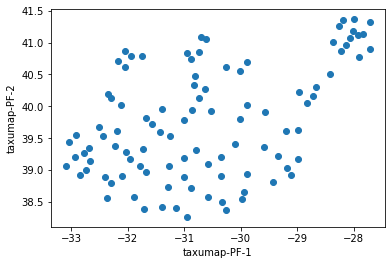

In [8]:
# Visualize your TaxUMAP
fig, ax  = tu.scatter(save=True, outdir='example_results')

# TaxUMAP will save this plot as `taxumap_scatterplot.pdf` in the location specified by parameter `outdir`. If no location is given, it will default to the present working directory.

### Save TaxUMAP embedding

In [9]:
tu.save_embedding('example_results/taxumap_olin_embedding.csv')

# If no path provided, TaxUMAP will save the embedded as "taxumap_embedding.csv" to the present working directory.

Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])